# Importing necessary **libraries**

In [ ]:
from __future__ import print_function
import os
import numpy as np# linear algebra
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import keras

# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix, classification_report
import itertools
import tensorflow
%matplotlib inline

In [ ]:
print("ver of ter",tensorflow.__version__)
print("ver of ter",keras.__version__)

ver of ter 2.15.0
ver of ter 2.15.0


**# Setting up data augmentation for the training data**

In [ ]:
data="/content/drive/MyDrive/cifar10-image/cifar10-raw-images/images/train"
train_data=ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
)

**Data-Augmentation**

In [ ]:
data_train_path=train_data.flow_from_directory(data,
                                               target_size=(32,32),
                                               batch_size=32,
                                               class_mode='categorical')

Found 50000 images belonging to 10 classes.


**Displaying class indices**

In [ ]:
data_train_path.class_indices

{'Airplane': 0,
 'Automobile': 1,
 'Bird': 2,
 'Cat': 3,
 'Deer': 4,
 'Dog': 5,
 'Frog': 6,
 'Horse': 7,
 'Ship': 8,
 'Truck': 9}

**split the data for validation and augmentation the validation data**

In [ ]:
valid_data=ImageDataGenerator(rescale=1./255,validation_split=0.3)
validation_data=valid_data.flow_from_directory(data,
                                               target_size=(32,32),
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset = 'validation'
                                               )

Found 15000 images belonging to 10 classes.


**Function to plot a set of images**

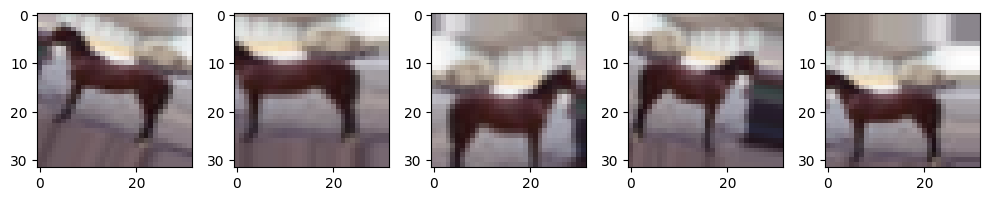

In [ ]:
def plot_images(image_arr):
  fig,axes=plt.subplots(1,5,figsize=(10,10))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
images=[data_train_path[0][0][0] for i in range(5)]
plot_images(images)

**Building the neural network model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=[32,32,3]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

**Compiling the model with Adam optimizer and  categorical crossentropy loss**

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

**Setting up model checkpoint for saving the best model during training**

In [ ]:
from  keras.callbacks import ModelCheckpoint
model_path="/content/drive/MyDrive/cifar10-image/cifar10-raw-images/cifar7.h5"
checkpoint=ModelCheckpoint(model_path,monitor="val_accuracy",verbose=1,save_best_only=True,mode='max')
checkpoint_list=[checkpoint]

**Training the model and monitoring validation accuracy**

In [ ]:
history=model.fit(data_train_path,epochs=100,verbose=1,validation_data=validation_data,callbacks=checkpoint_list)

Using real-time data augmentation.
Epoch 1/100


<ipython-input-28-7ff6acd9f458>:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 48s 27ms/step - loss: 1.8834 - accuracy: 0.3051 - val_loss: 1.5907 - val_accuracy: 0.4246
Epoch 2/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6231 - accuracy: 0.4051 - val_loss: 1.4224 - val_accuracy: 0.4846
Epoch 3/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4958 - accuracy: 0.4578 - val_loss: 1.3731 - val_accuracy: 0.5051
Epoch 4/100
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4078 - accuracy: 0.4910 - val_loss: 1.2311 - val_accuracy: 0.5614
Epoch 5/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3390 - accuracy: 0.5221 - val_loss: 1.2424 - val_accuracy: 0.5531
Epoch 6/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2751 - accuracy: 0.5496 - val_loss: 1.1566 - val_accuracy: 0.5924
Epoch 7/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2231 - accuracy: 0.5656 - val_loss: 1.1129 - val_

In [ ]:
model.save("thinkwik.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Plot the history of model--model accuracy and loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


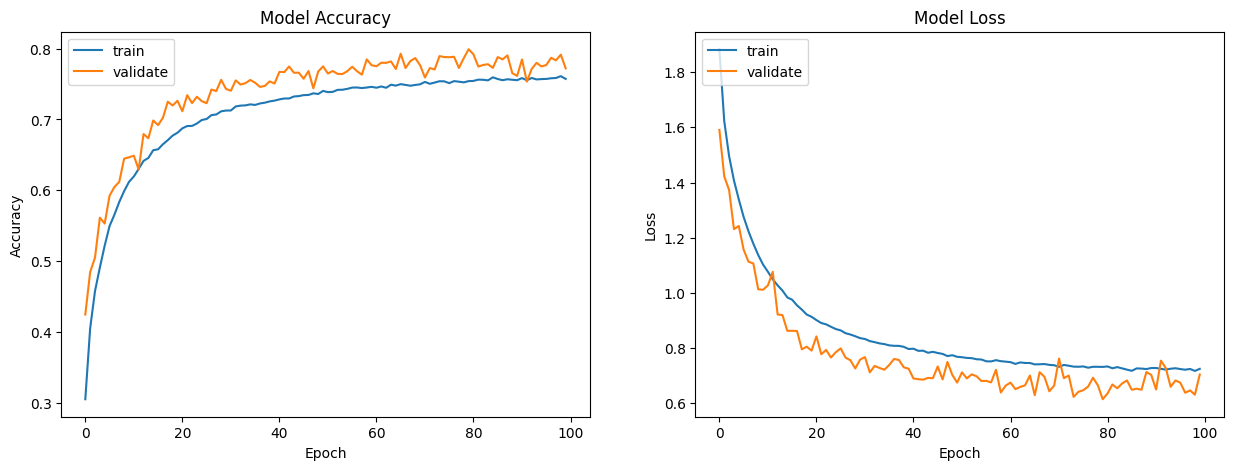

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

**Training-loss and validation-loss**

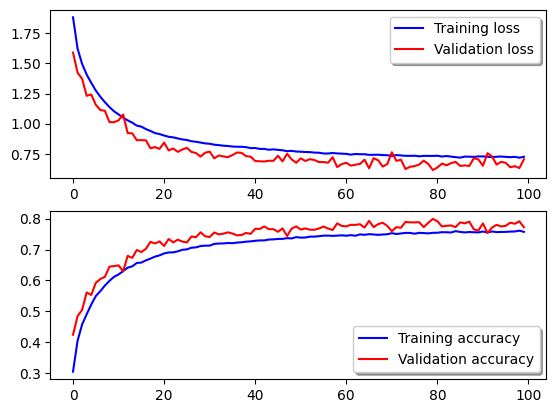

In [ ]:
# Vizualize history
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Here load test data**

In [ ]:
test="/content/drive/MyDrive/cifar10-image/cifar10-raw-images/images/test"

model2_test_datagen = ImageDataGenerator(rescale=1./255)
model2_test_generator = model2_test_datagen.flow_from_directory(
    test,
    target_size=(32, 32),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


**evalute the model on testing data**

In [ ]:
filenames = model2_test_generator.filenames
nb_samples = len(filenames)
model2_predict = model.predict_generator(model2_test_generator, steps=nb_samples, verbose=2)

In [ ]:
y_true = model2_test_generator.classes
y_pred = model2_predict.argmax(axis=1)

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title ("confusion matrix")


    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts


**Here we plot confusion matrix**

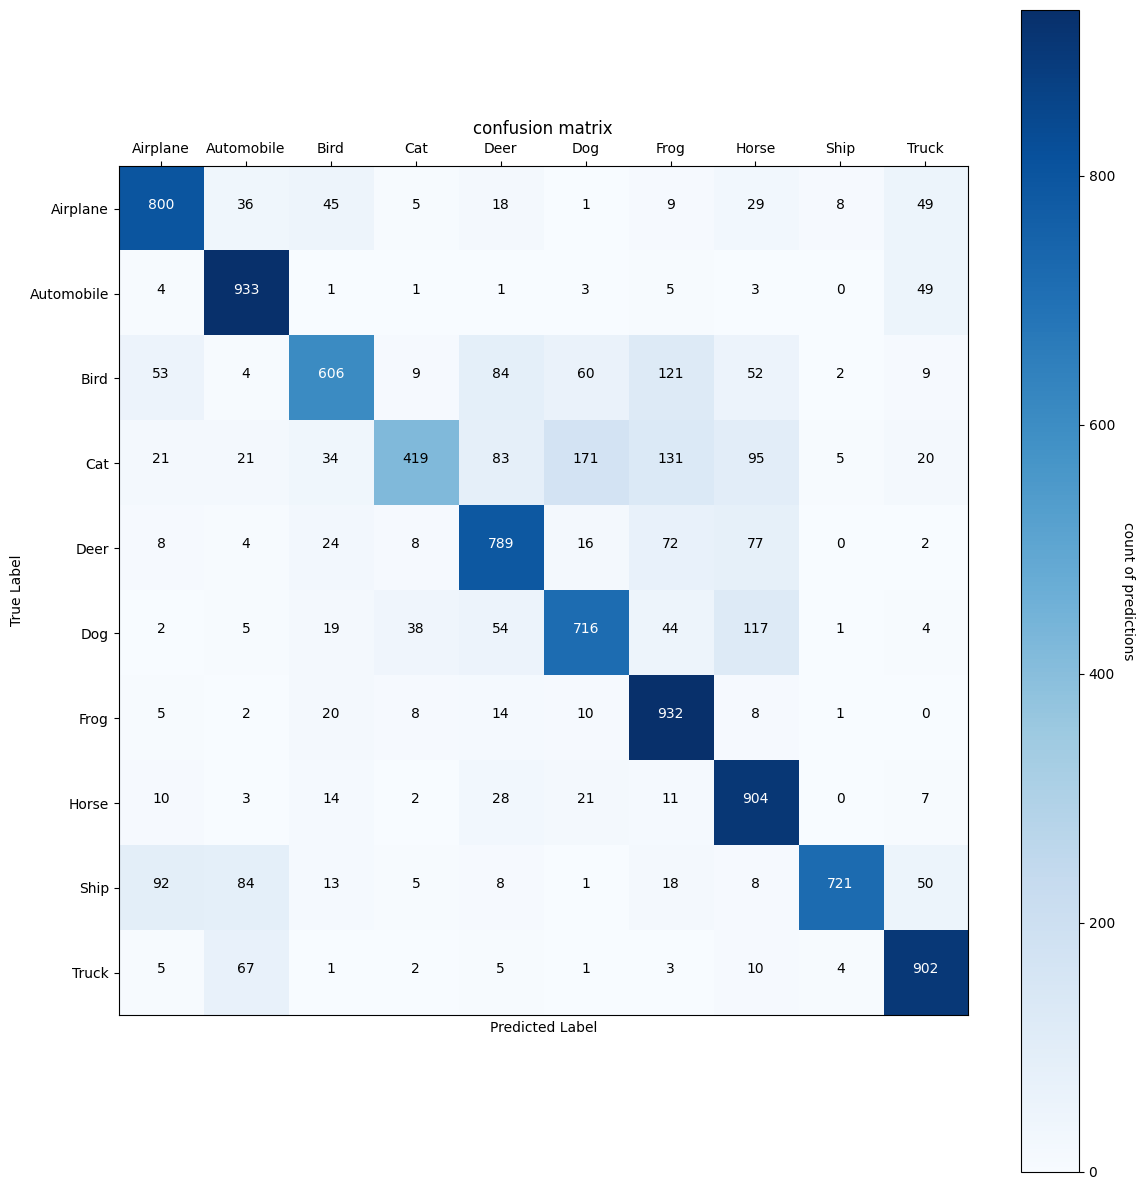

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors
y_true = model2_test_generator.classes
y_pred = model2_predict.argmax(axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred - y_true != 0)

Y_pred_classes_errors = y_pred[errors]

Y_true_errors = y_true[errors]


cm = confusion_matrix(y_true, y_pred)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

**Classification_report**

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.81      0.93      0.86      1000
           2       0.78      0.61      0.68      1000
           3       0.84      0.42      0.56      1000
           4       0.73      0.79      0.76      1000
           5       0.72      0.72      0.72      1000
           6       0.69      0.93      0.79      1000
           7       0.69      0.90      0.79      1000
           8       0.97      0.72      0.83      1000
           9       0.83      0.90      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.76     10000
weighted avg       0.79      0.77      0.76     10000

